In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,f1_score,classification_report
import xgboost as xgb
import lightgbm as lgb
from sklearn.naive_bayes import MultinomialNB

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import roc_curve, auc

from sklearn.feature_selection import SelectKBest,chi2

In [ ]:
sv=LinearSVC()
et=ExtraTreesClassifier()
kn=KNeighborsClassifier(n_neighbors=5)

lr=LogisticRegression()
xg=xgb.XGBClassifier()
mnb=MultinomialNB()
rt=RandomForestClassifier()
lg=lgb.LGBMClassifier()

In [ ]:
def printacc(y_pred,y_test):
    print(" Accuracy Score :",accuracy_score(y_pred,y_test))
    print("F1 Score :",f1_score(y_pred,y_test))
    print("Classification Report : ",classification_report(y_test,y_pred))
    
    

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)

    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()



def check_models_acc(X_train,y_train,X_test,y_test):
   
        
    xg.fit(X_train,y_train)
    y_pred=xg.predict(X_test)
    print('XGboost')
    printacc(y_pred,y_test)
    
    et.fit(X_train,y_train)
    y_pred=et.predict(X_test)
   
    print('Extra tree class')
    printacc(y_pred,y_test)
    
        
    rt.fit(X_train,y_train)
    y_pred=rt.predict(X_test)
    
    print('random forest')
    printacc(y_pred,y_test)
    
    
    lg.fit(X_train,y_train)
    y_pred=lg.predict(X_test)
    print('Lightgbm')
    printacc(y_pred,y_test)
    
    
    '''
    
    kn.fit(X_train,y_train)
    y_pred=kn.predict(X_test)
    print('KNN')
    printacc(y_pred,y_test)
    
    
    
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    print('logistic regression')
    printacc(y_pred,y_test)
    
    


     
   
    sv.fit(X_train,y_train)
    y_pred=sv.predict(X_test)
    print('SVM')
    printacc(y_pred,y_test)
     

       
    
     
    
    mnb.fit(X_train,y_train)

    y_pred=mnb.predict(X_test)
    
    print('multi nomial')
    printacc(y_pred,y_test)
    '''
    
    
def checkDist(y):

    unique_elements, counts_elements = np.unique(y, return_counts=True)

    print("Frequency of unique values of the said array: y ")
    print(np.asarray((unique_elements, counts_elements)))
    print('\n')
    print('\n')
    print('\n')


def chechpredict():
   
    print(" XGBoost ")
    ypr=xg.predict(Xt)
    checkDist(ypr)
  
    print(" extra  tree ")
    ypr=et.predict(Xt)
    checkDist(ypr)
    
    
    print(" random forest ")
    ypr=rt.predict(Xt)
    checkDist(ypr)
    
    print(" lightgbm ")
    ypr=lg.predict(Xt)
    checkDist(ypr)
    
   
    '''
    print(" logistic regression")
    ypr=lr.predict(Xt)
    checkDist(ypr)
    
    print(" kNN ")
    ypr=kn.predict(Xt)
    checkDist(ypr)
    

    
    
    print(" multinomial")
    ypr=mnb.predict(Xt)
    checkDist(ypr)
    print(" svm")
    
    ypr=sv.predict(Xt)
    checkDist(ypr)
    
    '''



In [ ]:
df=pd.read_csv('train.csv')
df['first_payment_month']=df.first_payment_date.apply(lambda x:x.split('/')[0])

df['first_payment_month']=df.first_payment_month.astype('object')
df['origination_month']=df.origination_date.apply(lambda x:x.split('-')[1])

df['origination_month']=df.origination_month.astype('object')

df['mt']=df.m1+df.m2+df.m3+df.m4+df.m5+df.m6+df.m7+df.m8+df.m9+df.m10+df.m11+df.m12

df = shuffle(df)




y=df.m13.values

df.drop(['origination_date','first_payment_date','m13','loan_id'],axis=1,inplace=True)
  
df=pd.get_dummies(df)

X=df.values
sc=StandardScaler()
sc.fit_transform(X)


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
month_to_num={"Jan":1,"Feb":2,"Mar":3,"Apr":4,"May":5,"Jun":6,"Jul":7,"Aug":8,"Sep":9,"Oct":10,"Nov":11,"Dec":12}
dt=pd.read_csv('test.csv')
dt['first_payment_month']=dt.first_payment_date.apply(lambda x:month_to_num[x.split('-')[0]])

dt['first_payment_month']=dt.first_payment_month.astype('object')
dt['origination_month']=dt.origination_date.apply(lambda x:x.split('/')[1])

dt['origination_month']=dt.origination_month.astype('object')
dt['mt']=dt.m1+dt.m2+dt.m3+dt.m4+dt.m5+dt.m6+dt.m7+dt.m8+dt.m9+dt.m10+dt.m11+dt.m12

l1=dt.loan_id
#dt.drop(['origination_date','first_payment_date','loan_id'],axis=1,inplace=True)
#dt.drop(['origination_date','first_payment_date','source','financial_institution','loan_purpose','loan_id'],axis=1,inplace=True)
dt.drop(['origination_date','first_payment_date','loan_id'],axis=1,inplace=True)
    
dt=pd.get_dummies(dt)
Xt=dt.values

Xt=sc.transform(Xt)


In [ ]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl, id_tl = tl.fit_sample(X_train, y_train)

print('Removed indexes:', id_tl)

plot_2d_space(X_tl, y_tl, 'Tomek links under-sampling')

In [ ]:
check_models_acc(X_tl,y_tl,X_test,y_test)
chechpredict()

In [ ]:
ypr=rt.predict(Xt)
tp=pd.DataFrame({'loan_id':l1,'m13':ypr})

tp.to_csv('Submission_sampl_RT5.csv',index=False)


ypr=et.predict(Xt)
tp=pd.DataFrame({'loan_id':l1,'m13':ypr})

tp.to_csv('Submission_sampl_XT5.csv',index=False)

ypr=xg.predict(Xt)
tp=pd.DataFrame({'loan_id':l1,'m13':ypr})

tp.to_csv('Submission_sampl_XG5.csv',index=False)

ypr=lg.predict(Xt)
tp=pd.DataFrame({'loan_id':l1,'m13':ypr})

tp.to_csv('Submission_sampl_lG5.csv',index=False)

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X_train, y_train)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')

plot_2d_space(X_ros, y_ros, 'Random over-sampling')

In [ ]:
check_models_acc(X_ros,y_ros,X_test,y_test)
chechpredict()

In [ ]:
ypr=rt.predict(Xt)
tp=pd.DataFrame({'loan_id':l1,'m13':ypr})

tp.to_csv('Submission_sampl_RT6.csv',index=False)


ypr=et.predict(Xt)
tp=pd.DataFrame({'loan_id':l1,'m13':ypr})

tp.to_csv('Submission_sampl_XT6.csv',index=False)

ypr=xg.predict(Xt)
tp=pd.DataFrame({'loan_id':l1,'m13':ypr})

tp.to_csv('Submission_sampl_XG6.csv',index=False)

ypr=lg.predict(Xt)
tp=pd.DataFrame({'loan_id':l1,'m13':ypr})

tp.to_csv('Submission_sampl_lG6.csv',index=False)

In [45]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [46]:
model = Sequential()
model.add(Dense(32, activation='relu'))

model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# 2. compile the network
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [47]:
with tf.device("/:gpu:0"):
    model.fit(X_ros,y_ros,epochs=3,batch_size=20,validation_data=(X_test,y_test))

Instructions for updating:
Use tf.cast instead.
Train on 184694 samples, validate on 23212 samples
Epoch 1/3
184694/184694 [==============================] - 90s 488us/step - loss: 8.0590 - acc: 0.5000 - val_loss: 0.0951 - val_acc: 0.9941
Epoch 2/3
184694/184694 [==============================] - 76s 409us/step - loss: 8.0590 - acc: 0.5000 - val_loss: 0.0951 - val_acc: 0.9941
Epoch 3/3
184694/184694 [==============================] - 78s 424us/step - loss: 8.0590 - acc: 0.5000 - val_loss: 0.0951 - val_acc: 0.9941


In [48]:
y_pred=model.predict_classes(X_test)
y_pred=y_pred.flatten()
printacc(y_pred,y_test)



 Accuracy Score : 0.9940978804066862
F1 Score : 0.0
Classification Report :                precision    recall  f1-score   support

           0       0.99      1.00      1.00     23075
           1       0.00      0.00      0.00       137

    accuracy                           0.99     23212
   macro avg       0.50      0.50      0.50     23212
weighted avg       0.99      0.99      0.99     23212



In [49]:
ypr=model.predict_classes(Xt)
ypr=ypr.flatten()
checkDist(ypr)

Frequency of unique values of the said array: y 
[[    0     1]
 [28414  7452]]








In [96]:
df=pd.read_csv('train.csv')
df['first_payment_month']=df.first_payment_date.apply(lambda x:x.split('/')[0])

df['first_payment_month']=df.first_payment_month.astype('object')
df['origination_month']=df.origination_date.apply(lambda x:x.split('-')[1])

df['origination_month']=df.origination_month.astype('object')

df['mt']=df.m1+df.m2+df.m3+df.m4+df.m5+df.m6+df.m7+df.m8+df.m9+df.m10+df.m11+df.m12

df = shuffle(df)




y=df.m13.values

df.drop(['insurance_type','origination_date','first_payment_date','m13','loan_id'],axis=1,inplace=True)
  
df=pd.get_dummies(df)

X=df.values


In [97]:
X_train.shape

(92621, 20)

Removed indexes: [     0      1      2 ... 116055 116056 116057]


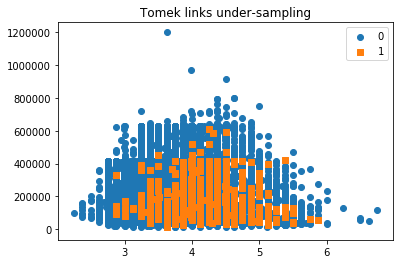

In [98]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl, id_tl = tl.fit_sample(X, y)

print('Removed indexes:', id_tl)

plot_2d_space(X_tl, y_tl, 'Tomek links under-sampling')

In [99]:
#sc=StandardScaler()
#X_tl=sc.fit_transform(X_tl)

X_tl=X_tl.astype('int')


ch2=SelectKBest(chi2,k=30)

X_tl=ch2.fit_transform(X_tl,y_tl)



X_train,X_test,y_train,y_test=train_test_split(X_tl,y_tl,test_size=0.2)

In [100]:
month_to_num={"Jan":1,"Feb":2,"Mar":3,"Apr":4,"May":5,"Jun":6,"Jul":7,"Aug":8,"Sep":9,"Oct":10,"Nov":11,"Dec":12}
dt=pd.read_csv('test.csv')
dt['first_payment_month']=dt.first_payment_date.apply(lambda x:month_to_num[x.split('-')[0]])

dt['first_payment_month']=dt.first_payment_month.astype('object')
dt['origination_month']=dt.origination_date.apply(lambda x:x.split('/')[1])

dt['origination_month']=dt.origination_month.astype('object')
dt['mt']=dt.m1+dt.m2+dt.m3+dt.m4+dt.m5+dt.m6+dt.m7+dt.m8+dt.m9+dt.m10+dt.m11+dt.m12

l1=dt.loan_id
#dt.drop(['origination_date','first_payment_date','loan_id'],axis=1,inplace=True)
#dt.drop(['origination_date','first_payment_date','source','financial_institution','loan_purpose','loan_id'],axis=1,inplace=True)
dt.drop(['insurance_type','origination_date','first_payment_date','loan_id'],axis=1,inplace=True)
    
dt=pd.get_dummies(dt)
Xt=dt.values

#Xt=sc.transform(Xt)
Xt=Xt.astype('int')
Xt=ch2.transform(Xt)





XGboost
 Accuracy Score : 0.996026947659354
F1 Score : 0.5353535353535354
Classification Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     23025
           1       0.79      0.40      0.54       131

    accuracy                           1.00     23156
   macro avg       0.89      0.70      0.77     23156
weighted avg       1.00      1.00      1.00     23156



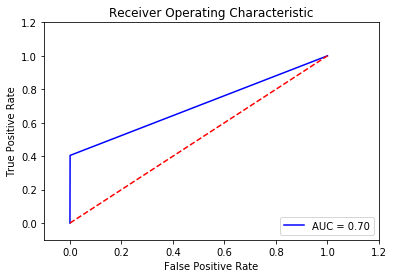

Extra tree class
 Accuracy Score : 0.9953359820348938
F1 Score : 0.45999999999999996
Classification Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     23025
           1       0.67      0.35      0.46       131

    accuracy                           1.00     23156
   macro avg       0.83      0.68      0.73     23156
weighted avg       0.99      1.00      0.99     23156



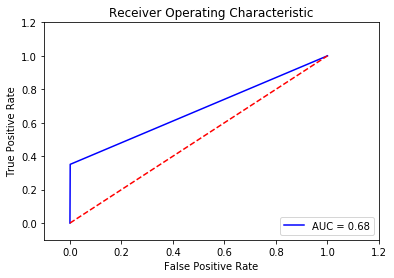

random forest
 Accuracy Score : 0.9955087234410088
F1 Score : 0.4693877551020408
Classification Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     23025
           1       0.71      0.35      0.47       131

    accuracy                           1.00     23156
   macro avg       0.85      0.68      0.73     23156
weighted avg       0.99      1.00      0.99     23156



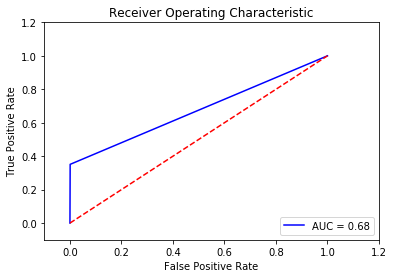

Lightgbm
 Accuracy Score : 0.9952064259803075
F1 Score : 0.4884792626728111
Classification Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     23025
           1       0.62      0.40      0.49       131

    accuracy                           1.00     23156
   macro avg       0.81      0.70      0.74     23156
weighted avg       0.99      1.00      0.99     23156



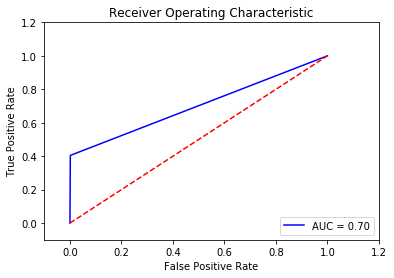

In [101]:
check_models_acc(X_train,y_train,X_test,y_test)


In [102]:
chechpredict()

 XGBoost 
Frequency of unique values of the said array: y 
[[    0     1]
 [35784    82]]






 extra  tree 
Frequency of unique values of the said array: y 
[[    0     1]
 [35763   103]]






 random forest 
Frequency of unique values of the said array: y 
[[    0     1]
 [35791    75]]






 lightgbm 
Frequency of unique values of the said array: y 
[[    0     1]
 [35747   119]]






